In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
from flash.image import ImageClassificationData, ImageClassifier
from flash import Trainer

In [7]:
LOGDIR = 'training-metrics'
NORMALIZED_DATA = '../../Training-baseline/'
EPOCHS = 20
FINETUNE_STRATEGY = 'no-freeze-customLR'
VERSION = (str(EPOCHS) + 'Epochs-' + FINETUNE_STRATEGY)

In [8]:
metrics = pd.read_csv(f'{LOGDIR}/{VERSION}.csv')
display(metrics)

,Unnamed: 0,train_loss,train_acc,val_loss,val_acc,trainf1,valf1
0,0,2.532984,0.423115,2.056395,0.472185,0.085500,0.179390
1,1,1.736980,0.661662,1.417265,0.709272,0.279382,0.381122
2,2,1.151903,0.705707,1.120589,0.731457,0.480417,0.526479
3,3,0.789980,0.722596,0.953706,0.716887,0.628554,0.602510
4,4,0.520092,0.729220,0.890170,0.685430,0.740214,0.647172
5,5,0.350799,0.717408,0.871278,0.668212,0.810764,0.675028
6,6,0.226451,0.719726,0.869166,0.675166,0.855537,0.685551
7,7,0.160503,0.717187,0.856020,0.677152,0.886427,0.693964
8,8,0.118846,0.721161,0.864008,0.683113,0.904785,0.700486
9,9,0.090734,0.721382,0.896676,0.669536,0.914034,0.701304


<AxesSubplot:title={'center':'Loss'}>

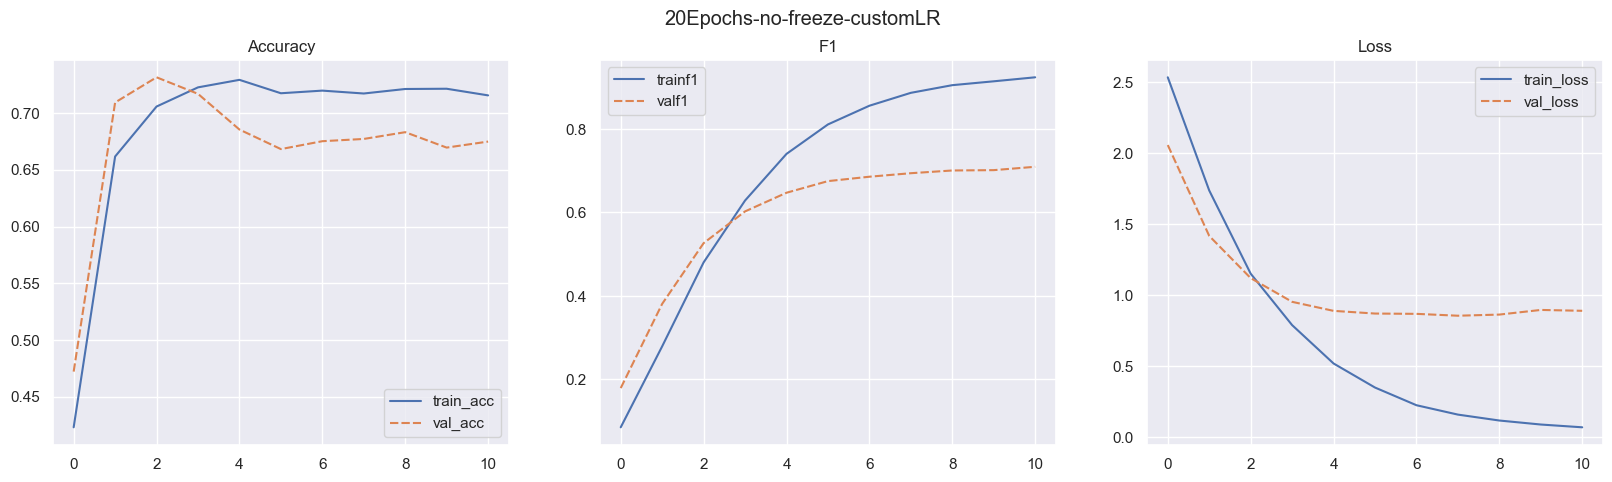

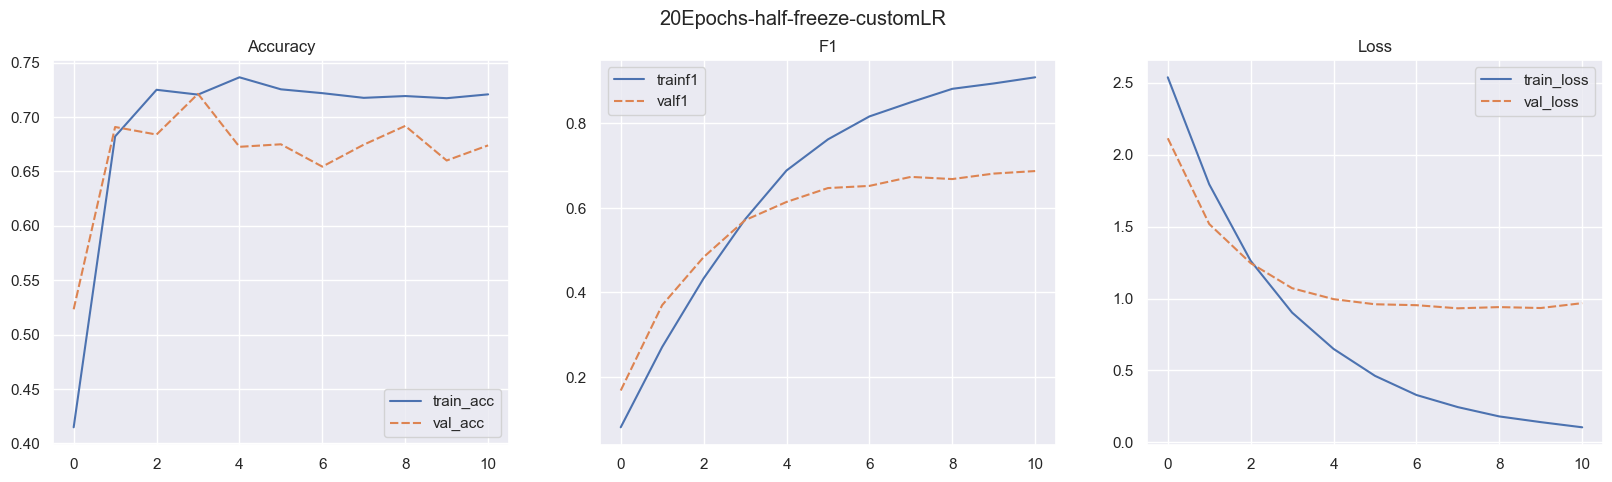

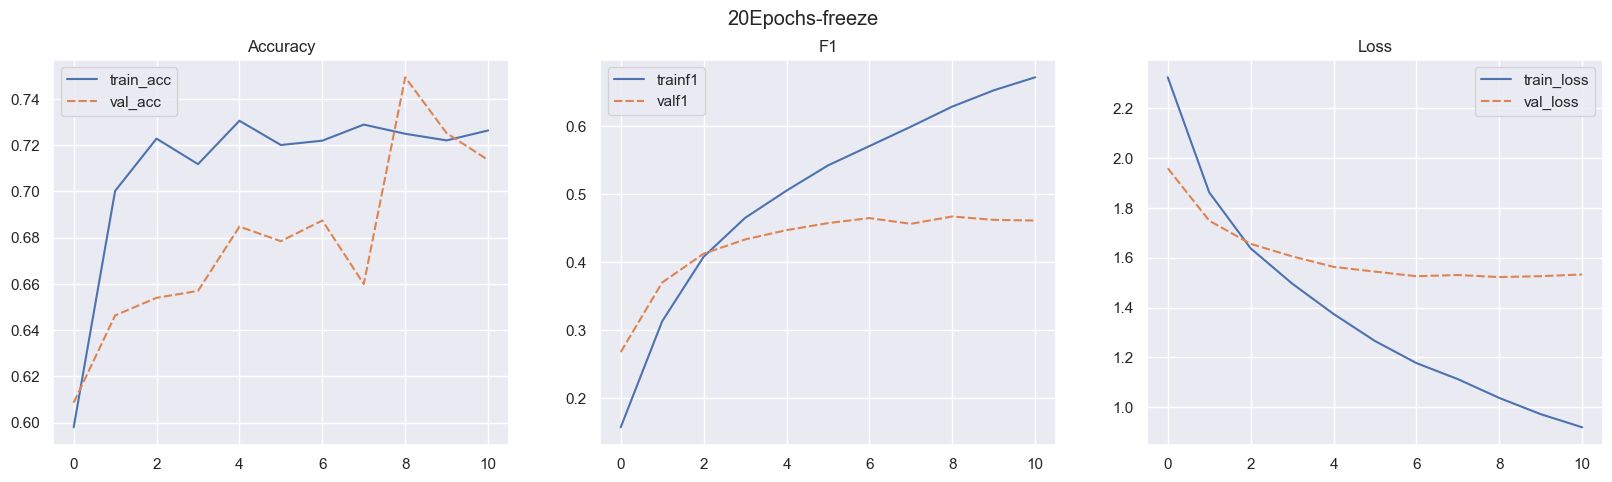

In [9]:
sns.set()

figure, axes = plt.subplots(1, 3, sharex='all', figsize=(20,5))
figure.suptitle(VERSION)
axes[0].set_title('Accuracy')
axes[1].set_title('F1')
axes[2].set_title('Loss')

sns.lineplot(data=metrics[['train_acc', 'val_acc']], ax=axes[0])
sns.lineplot(data=metrics[['trainf1', 'valf1']], ax=axes[1])
sns.lineplot(data=metrics[['train_loss', 'val_loss']], ax=axes[2])

VERSION = '20Epochs-half-freeze-customLR'
metrics = pd.read_csv(f'{LOGDIR}/{VERSION}.csv')
metrics = metrics.drop(metrics.index[11:])

figure, axes = plt.subplots(1, 3, sharex='all', figsize=(20,5))
figure.suptitle(VERSION)
axes[0].set_title('Accuracy')
axes[1].set_title('F1')
axes[2].set_title('Loss')

sns.lineplot(data=metrics[['train_acc', 'val_acc']], ax=axes[0])
sns.lineplot(data=metrics[['trainf1', 'valf1']], ax=axes[1])
sns.lineplot(data=metrics[['train_loss', 'val_loss']], ax=axes[2])

VERSION = '20Epochs-freeze'
metrics = pd.read_csv(f'{LOGDIR}/{VERSION}.csv')
metrics = metrics.drop(metrics.index[11:])

figure, axes = plt.subplots(1, 3, sharex='all', figsize=(20,5))
figure.suptitle(VERSION)
axes[0].set_title('Accuracy')
axes[1].set_title('F1')
axes[2].set_title('Loss')

sns.lineplot(data=metrics[['train_acc', 'val_acc']], ax=axes[0])
sns.lineplot(data=metrics[['trainf1', 'valf1']], ax=axes[1])
sns.lineplot(data=metrics[['train_loss', 'val_loss']], ax=axes[2])